In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import ttest_ind
from matplotlib import rcParams
from pyBioInfo.IO.File import GtfFile, GtfGeneBuilder
rcParams["font.family"] = "arial"

## FPKM correlation

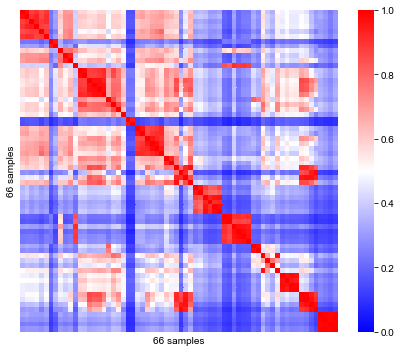

In [150]:
dat = pd.read_csv("results/expression/stringtie.fpkm.gene.tsv", sep="\t", index_col=0)
corr = dat.corr()
plt.figure(figsize=(6, 5))
seaborn.heatmap(corr, cmap="bwr", vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
plt.xlabel("66 samples")
plt.ylabel("66 samples")
plt.tight_layout()
if True:
    plt.show()
else:
    plt.savefig("figures/fpkm_correlation.png", dpi=300)
plt.close()

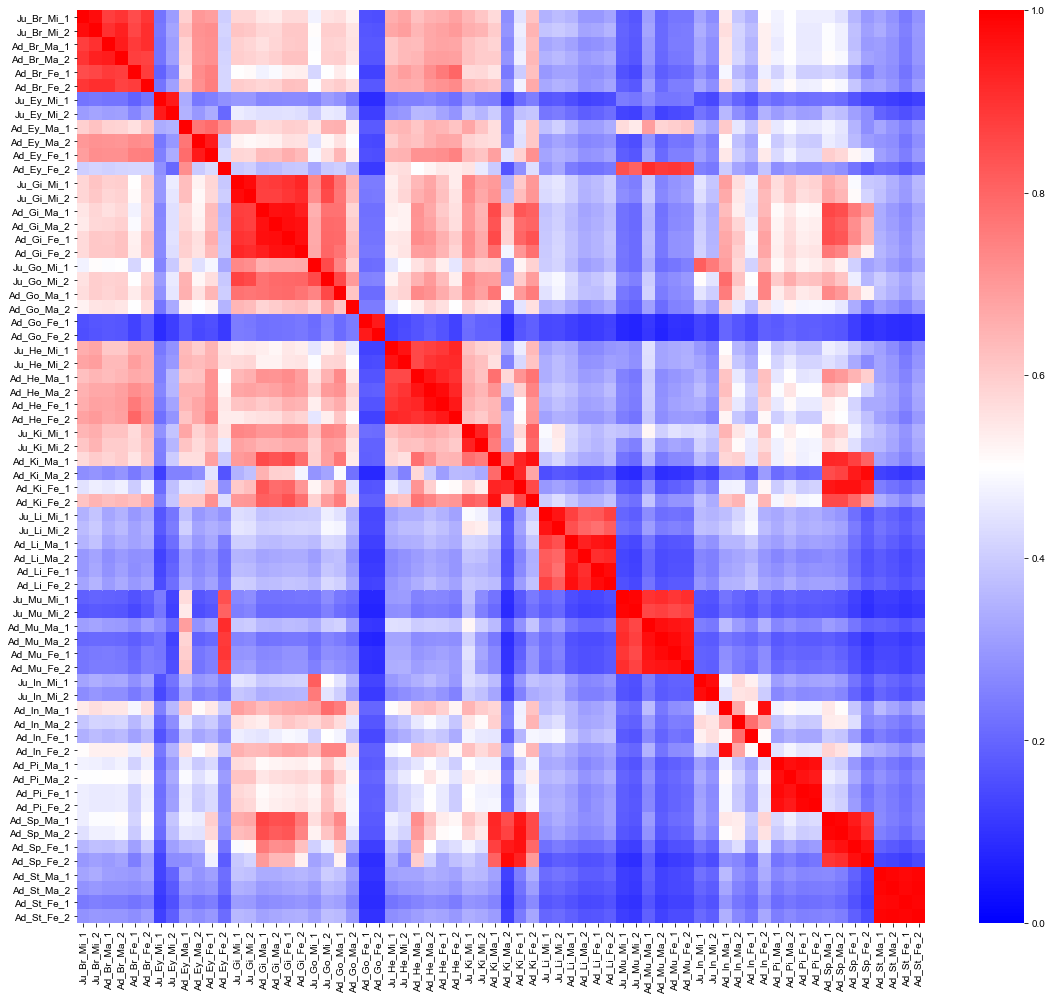

In [155]:
dat = pd.read_csv("results/expression/stringtie.fpkm.gene.tsv", sep="\t", index_col=0)
corr = dat.corr()
plt.figure(figsize=(16, 14))
seaborn.heatmap(corr, cmap="bwr", vmin=0, vmax=1)
plt.tight_layout()
if True:
    plt.show()
else:
    plt.savefig("figures/fpkm_correlation.full.png", dpi=300)
plt.close()

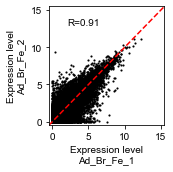

In [186]:
dat = pd.read_csv("results/expression/stringtie.fpkm.gene.tsv", sep="\t", index_col=0)
xs = np.log2(dat["Ad_Br_Fe_1"] + 1)
ys = np.log2(dat["Ad_Br_Fe_2"] + 1)
r = np.corrcoef(xs, ys)[0][1]
plt.figure(figsize=(2.5, 2.5))
plt.scatter(xs, ys, marker=".", s=5, color="black")
plt.plot([-0.5, 15.5], [-0.5, 15.5], ls="--", color="red")
plt.xlim(-0.5, 15.5)
plt.ylim(-0.5, 15.5)
plt.xticks([0, 5, 10, 15])
plt.yticks([0, 5, 10, 15])
plt.xlabel("Expression level\nAd_Br_Fe_1")
plt.ylabel("Expression level\nAd_Br_Fe_2")
plt.text(2, 13, "R=%.2f" % r)
plt.tight_layout()
plt.show()
plt.close()

## FPKM distribution

In [4]:
dat = pd.read_csv("results/expression/stringtie.fpkm.gene.tsv", sep="\t", index_col=0)

In [5]:
rows = []
for i, column in enumerate(dat.columns):
    values = np.zeros(5)
    for v in dat[column]:
        if 0 <= v < 0.1:
            values[0] += 1
        elif 0.1 <= v < 1:
            values[1] += 1
        elif 1 <= v < 10:
            values[2] += 1
        elif 10 <= v < 100:
            values[3] += 1
        else:
            values[4] += 1
    rows.append(values)
m = pd.DataFrame(rows)
m.index = dat.columns

In [19]:
plt.figure(figsize=(4, 5))
bottoms = np.zeros(len(m))
colors = ["lightgrey", "dimgrey", "orange", "blue", "red"]
labels = ["0 - 0.1", "0.1 - 1", "1 - 10", "10 - 100", "> 100"]
xs = np.arange(len(m))
for i, column in enumerate(m.columns):
    ys = m[column]
    plt.barh(xs, ys, left=bottoms, color=colors[i], height=1, label=labels[i])
    # plt.bar(xs, ys, bottom=bottoms, color=colors[i], width=1)
    bottoms = bottoms + ys
    # break
plt.ylim(xs[0] - 0.5, xs[-1] + 0.5)
plt.xlim(0, bottoms[0])
plt.xlabel("Gene number")
plt.ylabel("Samples")
plt.yticks([])
# plt.yticks(xs, m.index)
plt.legend(title="FPKM", frameon=True)
plt.tight_layout()
if False:
    plt.show()
else:
    plt.savefig("figures/fpkm_distribution.png", dpi=300)
plt.close()

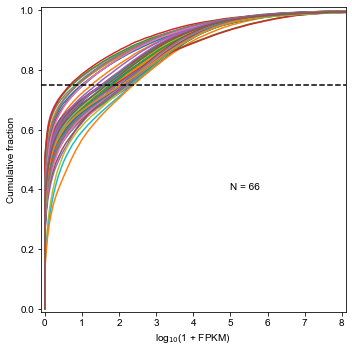

In [115]:
plt.figure(figsize=(5, 5))
vs = []
for column in dat.columns:
    xs = np.log2(1 + np.array(list(sorted(dat[column]))))
    ys = np.arange(len(xs)) / len(xs)
    v = xs[int(len(xs) * 0.75)]
    vs.append(v)
    plt.plot(xs, ys)
plt.axhline(0.75, color="black", ls="--")
plt.xlim(-0.1, 8.1)
plt.ylim(-0.01, 1.01)
plt.xlabel("log$_{10}$(1 + FPKM)")
plt.ylabel("Cumulative fraction")
plt.text(5, 0.4, "N = 66")
plt.tight_layout()
if True:
    plt.show()
else:
    plt.savefig("figures/fpkm_distribution.cumulative.png", dpi=300)
plt.close()

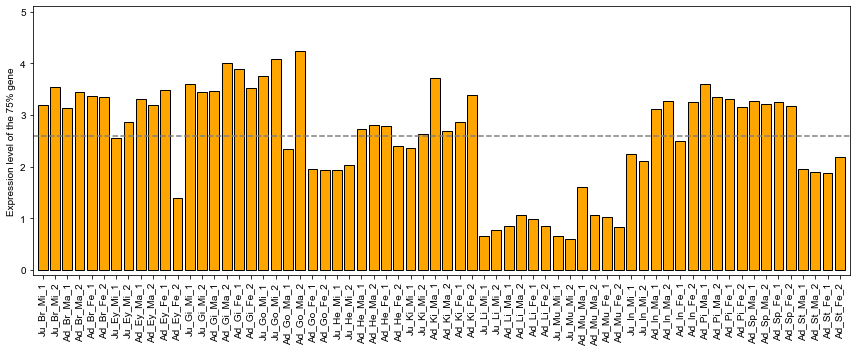

In [191]:
vs = []
colors = []
for column in dat.columns:
    xs = list(sorted(dat[column]))
    v = xs[int(len(xs) * 0.75)]
    vs.append(v)
    if "Mi" in column:
        colors.append("orange")
    if "Ma" in column:
        colors.append("blue")
    if "Fe" in column:
        colors.append("red")
ys = vs
xs = np.arange(len(ys))
xticks = dat.columns
plt.figure(figsize=(12, 5))
plt.bar(xs, ys, color="orange", edgecolor="black")
plt.axhline(np.mean(ys), ls="--", color="grey")
plt.xticks(xs, xticks, rotation=90)
plt.xlim(xs[0] - 0.8, xs[-1] + 0.8)
plt.ylim(-0.1, 5.1)
plt.ylabel("Expression level of the 75% gene")
plt.tight_layout()
if True:
    plt.show()
else:
    plt.savefig("figures/fpkm_distribution.bar.png", dpi=300)
plt.close()

In [113]:
array = []
for column in dat.columns:
    values = list(sorted(dat[column].values))
    values = np.array(values[-5000:])
    values = np.log2(1 + values)
    array.append(values)
xs = np.arange(len(array))
plt.figure(figsize=(12, 5))
plt.boxplot(array, positions=xs, showfliers=False, showmeans=True)
plt.axhline(4.2, ls="-", color="grey")
plt.xticks(xs, dat.columns, rotation=90)
plt.ylabel("FPKM distribution of genes (top 5000)")
plt.tight_layout()
if False:
    plt.show()
else:
    plt.savefig("figures/fpkm_distribution.boxplot.png", dpi=300)
plt.close()

In [144]:
tissues = list(set([c[3:5] for c in dat.columns]))
fig, axs = plt.subplots(3, 4, figsize=(10, 7.5))
for i, tissue in enumerate(tissues):
    plt.sca(axs[i // 4][i % 4])
    for column in dat.columns:
        xs = np.log2(1 + np.array(list(sorted(dat[column]))))
        ys = np.arange(len(xs)) / len(xs)
        plt.plot(xs, ys, color="grey")
    for column in dat.columns:
        if tissue not in column:
            continue
        xs = np.log2(1 + np.array(list(sorted(dat[column]))))
        ys = np.arange(len(xs)) / len(xs)
        plt.plot(xs, ys, color="blue")
    plt.title(tissue)
    plt.axhline(0.75, color="black", ls="--")
    plt.xlim(-0.1, 8.1)
    plt.ylim(-0.01, 1.01)
    if i // 4 == 2:
        plt.xlabel("log$_{10}$(1 + FPKM)")
    if i % 4 == 0:
        plt.ylabel("Cumulative fraction")
    plt.text(5, 0.4, "N = 66")
plt.tight_layout()
if False:
    plt.show()
else:
    plt.savefig("figures/fpkm_distribution.cumulative.tissue.png", dpi=300)
plt.close()

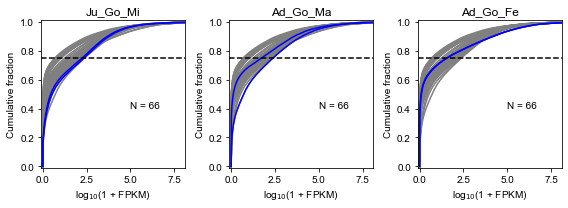

In [166]:
names = ["Ju_Go_Mi", "Ad_Go_Ma", "Ad_Go_Fe"]
fig, axs = plt.subplots(1, 3, figsize=(8, 3))
for i, name in enumerate(names):
    plt.sca(axs[i])
    plt.title(name)
    for column in dat.columns:
        xs = np.log2(1 + np.array(list(sorted(dat[column]))))
        ys = np.arange(len(xs)) / len(xs)
        plt.plot(xs, ys, color="grey")
    for column in dat.columns:
        if column.startswith(name):
            xs = np.log2(1 + np.array(list(sorted(dat[column]))))
            ys = np.arange(len(xs)) / len(xs)
            plt.plot(xs, ys, color="blue")
    plt.axhline(0.75, color="black", ls="--")
    plt.xlim(-0.1, 8.1)
    plt.ylim(-0.01, 1.01)
    plt.xlabel("log$_{10}$(1 + FPKM)")
    plt.ylabel("Cumulative fraction")
    plt.text(5, 0.4, "N = 66")
plt.tight_layout()
if True:
    plt.show()
else:
    plt.savefig("figures/fpkm_distribution.cumulative.gonad.png", dpi=300)
plt.close()

## Tissue specific genes

In [219]:
dat = pd.read_csv("results/expression/stringtie.fpkm.gene.tsv", sep="\t", index_col=0)
dat = dat[dat.max(axis=1) > 10]
print(len(dat))

20316

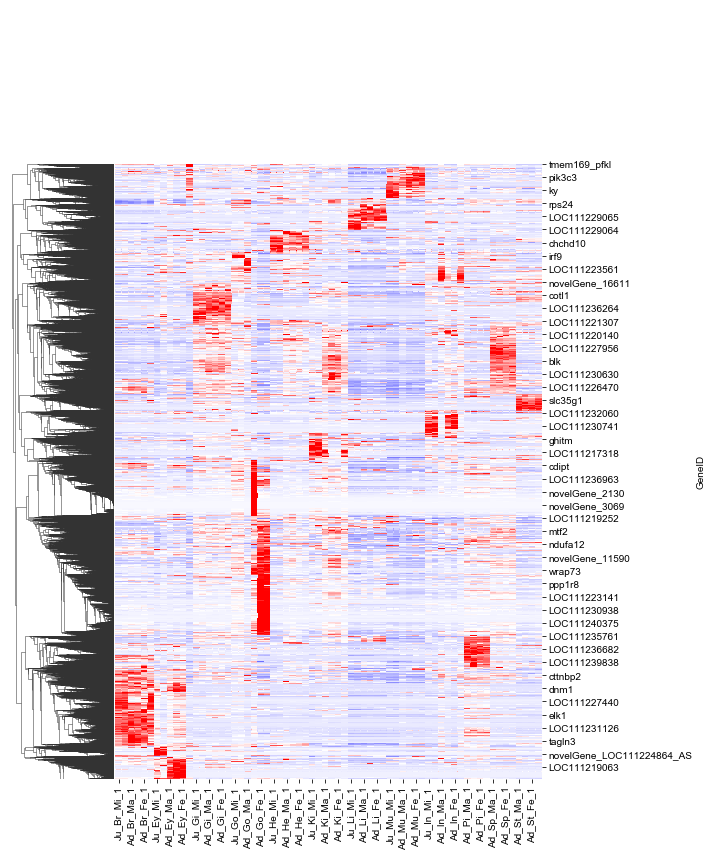

In [223]:
ret = seaborn.clustermap(dat, col_cluster=False, z_score=0, 
                         cmap="bwr", vmin=-4, vmax=4, figsize=(10, 12), cbar_pos=None)

In [224]:
ret.fig.savefig("figures/tissue_specific_gene.clustermap.png", dpi=300)

## DEGs between stages

In [225]:
dat = pd.read_csv("results/expression/stringtie.fpkm.gene.tsv", sep="\t", index_col=0)

In [263]:
tissues = list(set([x[3:5] for x in filter(lambda item: item.startswith("Ju_"), dat.columns)]))
rows = []
for tissue in tissues:
    cs1 = ["Ju_%s_Mi_1" % tissue, "Ju_%s_Mi_2" % tissue]
    
    cs2 = ["Ad_%s_Ma_1" % tissue, "Ad_%s_Ma_2" % tissue]
    tmp = dat[cs1 + cs2].copy()
    mean = tmp.mean(axis=1)
    log2fc = np.log2(tmp[cs2].mean(axis=1) / tmp[cs1].mean(axis=1))
    pvalues = []
    for vs in tmp.values:
        v1, v2, v3, v4 = vs
        s, p = ttest_ind([v1, v2], [v3, v4])
        pvalues.append(p)
    tmp["Mean"] = mean
    tmp["Log2FC"] = log2fc
    tmp["Pvalue"] = pvalues
    tmp = tmp[tmp["Mean"] >= 2]
    tmp = tmp[tmp["Pvalue"] < 0.05]
    a = sum(tmp["Log2FC"] > np.log2(1.5))
    b = sum(tmp["Log2FC"] < -np.log2(1.5))
    
    cs2 = ["Ad_%s_Fe_1" % tissue, "Ad_%s_Fe_2" % tissue]
    tmp = dat[cs1 + cs2].copy()
    mean = tmp.mean(axis=1)
    log2fc = np.log2(tmp[cs2].mean(axis=1) / tmp[cs1].mean(axis=1))
    pvalues = []
    for vs in tmp.values:
        v1, v2, v3, v4 = vs
        s, p = ttest_ind([v1, v2], [v3, v4])
        pvalues.append(p)
    tmp["Mean"] = mean
    tmp["Log2FC"] = log2fc
    tmp["Pvalue"] = pvalues
    tmp = tmp[tmp["Mean"] >= 2]
    tmp = tmp[tmp["Pvalue"] < 0.05]
    c = sum(tmp["Log2FC"] > np.log2(1.5))
    d = sum(tmp["Log2FC"] < -np.log2(1.5))
    rows.append([a, b, c, d])
d = pd.DataFrame(rows, columns=["Up_Ma", "Do_Ma", "Up_Fe", "Do_Fe"])
d.index = tissues

/home/chenzonggui/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [315]:
plt.figure(figsize=(6, 2.5))
xs = np.arange(len(d))
ys1 = d["Up_Ma"]
ys2 = -d["Do_Ma"]
ys3 = d["Up_Fe"]
ys4 = -d["Do_Fe"]
plt.bar(xs - 0.2, ys1, width=0.4, color="blue", label="Up (male)")
plt.bar(xs - 0.2, ys2, width=0.4, color="red", label="Down (male)")
plt.bar(xs + 0.2, ys3, width=0.4, color="steelblue", label="Up (female)")
plt.bar(xs + 0.2, ys4, width=0.4, color="tomato", label="Down (female)")
# plt.plot([xs[0] - 1, xs[-1] + 1], [0, 0], ls="-", color="grey", lw=1)
plt.xlim(xs[0] - 0.5, xs[-1] + 0.5)
plt.ylim(-6000, 6000)
plt.xticks(xs, d.index)
plt.yticks([-6000, -4000, -2000, 0, 2000, 4000, 6000], [6000, 4000, 2000, 0, 2000, 4000, 6000])
plt.ylabel("Gene number")
plt.grid(ls="--", lw=1, color="lightgrey")
plt.legend(loc=(1.05, 0.6), frameon=False)
plt.tight_layout()
if False:
    plt.show()
else:
    plt.savefig("figures/deg_between_stage.png", dpi=300)
plt.close()